In [71]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns

In [6]:
train = pd.read_csv("credit_score.csv")

/var/folders/r3/5mm6vxmn5lz3jtlcggxn4cv80000gn/T/ipykernel_13853/3884686260.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("archive-4/train.csv")


In [7]:
train.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
train.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [10]:
pd.unique(train['Credit_Score'])

array(['Good', 'Standard', 'Poor'], dtype=object)

In [11]:
pd.unique(train['Occupation'])

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [12]:
def removeUnderscore(value):
    first_index = 0
    last_index = len(value) - 1
    while first_index <= last_index:
        if value[first_index] == '_':
            first_index += 1
        if value[last_index] == '_':
            last_index -= 1
        if '_' not in value[first_index : last_index + 1]:
            if value[first_index : last_index + 1] == '':
                return 0
            else:
                return value[first_index : last_index + 1]
    

def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(train[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))
        
        train[each_column] = new_data

def modifyDataTest(columns):
    for each_column in columns:
        data = [str(value) for value in list(test[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))
        
        test[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])

In [13]:
train.head(30)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,NaN,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [14]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [15]:
namecol = train.columns

In [16]:
namecol

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [17]:
train.drop(["ID",'Name','SSN','Month'],axis=1,inplace=True)

In [18]:
for col in train.columns:
    print(f'{col} : {train[col].dtype}')

Customer_ID : object
Age : float64
Occupation : object
Annual_Income : float64
Monthly_Inhand_Salary : float64
Num_Bank_Accounts : int64
Num_Credit_Card : int64
Interest_Rate : int64
Num_of_Loan : float64
Type_of_Loan : object
Delay_from_due_date : int64
Num_of_Delayed_Payment : float64
Changed_Credit_Limit : float64
Num_Credit_Inquiries : float64
Credit_Mix : object
Outstanding_Debt : float64
Credit_Utilization_Ratio : float64
Credit_History_Age : object
Payment_of_Min_Amount : object
Total_EMI_per_month : float64
Amount_invested_monthly : float64
Payment_Behaviour : object
Monthly_Balance : float64
Credit_Score : object


Dla wszytkich kolumn mamy juz interesujący nas typ danych. Mozemy przejść do dalszego preprocesingu danych. 

In [19]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


Jak widzimy dla kolumn Age, Num_Bank_Accounts, Num_of_Loan mamy wartości ujemne, oraz skrajne duze co nie powinno mieć miejsca. 

In [20]:
train['Num_Bank_Accounts'][train['Num_Bank_Accounts']<0].count()

21

In [21]:
print(train['Num_of_Loan'][train['Num_of_Loan']<0])
print(train['Num_of_Loan'][train['Num_of_Loan']<0].count()/train.__len__())

31      -100.0
34      -100.0
39      -100.0
53      -100.0
61      -100.0
         ...  
99877   -100.0
99901   -100.0
99902   -100.0
99969   -100.0
99987   -100.0
Name: Num_of_Loan, Length: 3876, dtype: float64
0.03876


Tak mało wartości, mozemy spokojnie dropnać je.

In [22]:
train.drop(train[train['Num_Bank_Accounts'] < 0].index,inplace=True)
train.drop(train[train['Num_of_Loan'] < 0].index,inplace=True)

In [23]:
train['Num_Bank_Accounts'].quantile(0.975)

10.0

In [24]:
train['Num_of_Loan'].quantile(0.975)

9.0

In [25]:
train['Num_Credit_Card'].quantile(0.975)

10.0

Widzimy, ze 97.5% zbioru ma maksymalnie 10 kont bankowych, dlatego zaluzmy ze maksymalna ilosc kont wynosi 10.  

In [26]:
train['Num_of_Loan'][train['Num_of_Loan']>10].count()

472

In [27]:
train.drop(train[train['Num_Bank_Accounts'] > 10].index,inplace=True)
train.drop(train[train['Num_of_Loan'] > 9].index,inplace=True)
train.drop(train[train['Num_Credit_Card'] > 10].index,inplace=True)

In [28]:
train.reset_index(drop=True,inplace=True)

In [29]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92179.000000,9.217900e+04,78346.000000,92179.000000,92179.000000,92179.000000,92179.000000,92179.000000,85754.000000,92179.000000,90385.000000,92179.000000,92179.000000,92179.000000,88061.000000,9.106900e+04
mean,110.625273,1.762684e+05,4198.648006,5.368674,5.529893,72.944488,3.534438,21.064266,31.053607,10.173017,27.865332,1427.106633,32.291366,1408.338151,636.396810,-3.294205e+22
std,686.158632,1.427782e+06,3185.991416,2.591570,2.065889,469.283603,2.446537,14.860820,227.393462,6.890377,193.555262,1156.284843,5.116370,8319.842279,2040.696972,3.313566e+24
min,-500.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945305e+04,1625.265833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,4.950000,3.000000,565.480000,28.064889,30.338701,74.521358,2.700571e+02
50%,33.000000,3.764810e+04,3097.025000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.230000,32.307019,69.272824,135.801280,3.368560e+02
75%,42.000000,7.288608e+04,5967.333333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.680000,9.000000,1950.000000,36.506915,161.405543,265.556351,4.703105e+02
max,8698.000000,2.419806e+07,15204.633333,10.000000,10.000000,5797.000000,9.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


Zajmijmy się teraz wiekiem. Jak widzimy ponizej, wiek niektórych klientów znamy:

In [30]:
train[train['Customer_ID']=='CUS_0xd40']

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [31]:
train['Age'] = train.groupby('Customer_ID')['Age'].transform(lambda x : x.mode()[0])

In [32]:
train['Age'].describe()

count    92179.000000
mean        33.283166
std         10.772504
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [33]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13833
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10503
Delay_from_due_date             0
Num_of_Delayed_Payment       6425
Changed_Credit_Limit            0
Num_Credit_Inquiries         1794
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8363
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4118
Payment_Behaviour               0
Monthly_Balance              1110
Credit_Score                    0
dtype: int64

In [34]:
null_num_cols = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(train[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()


Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [35]:
train[null_num_cols] = imputed_numerical

In [36]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10503
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8363
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [37]:
categorical = train.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [38]:
for col in categorical:
    print(f'{col}: {train[col].value_counts()}')

Customer_ID: Customer_ID
CUS_0xd40     8
CUS_0x78eb    8
CUS_0x47d3    8
CUS_0x1138    8
CUS_0x7aa9    8
             ..
CUS_0x1d6f    2
CUS_0x3187    2
CUS_0x9ea6    1
CUS_0xa878    1
CUS_0x84df    1
Name: count, Length: 12500, dtype: int64
Occupation: Occupation
_______          6472
Lawyer           6047
Mechanic         5842
Scientist        5838
Architect        5823
Engineer         5818
Accountant       5764
Teacher          5750
Developer        5740
Media_Manager    5707
Entrepreneur     5690
Journalist       5646
Doctor           5597
Manager          5502
Writer           5478
Musician         5465
Name: count, dtype: int64
Type_of_Loan: Type_of_Loan
Not Specified                                                                                                                                                 1291
Personal Loan                                                                                                                                                 1154
Stud

Widzimy, ze teraz musimy się skupić na wartościach kategorycznych, poniewaz mamy nulle oraz wartości błedne w nich. 

In [39]:
train.loc[train['Credit_Mix'] == '_', 'Credit_Mix'] = np.nan
train.loc[train['Payment_of_Min_Amount'] == 'NM','Payment_of_Min_Amount'] = np.nan
train.loc[train['Payment_Behaviour'] == '!@9#%8','Payment_Behaviour'] = np.nan

/Users/jakubsuslik/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Credit_Mix', ylabel='Count'>

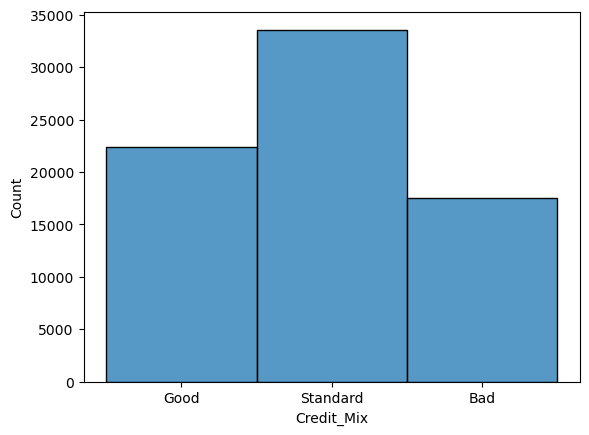

In [40]:
sns.histplot(train['Credit_Mix'])

/Users/jakubsuslik/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Payment_of_Min_Amount', ylabel='Count'>

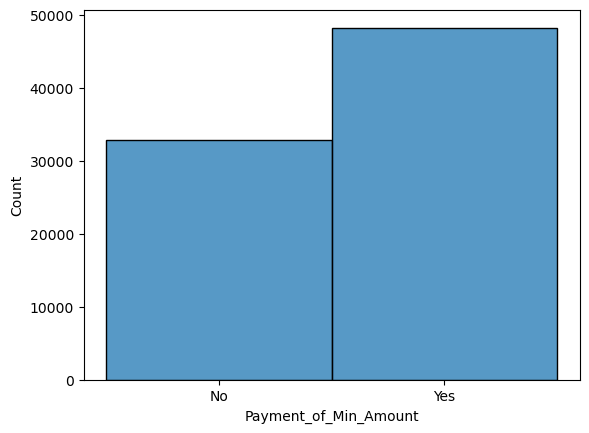

In [41]:
sns.histplot(train['Payment_of_Min_Amount'])

/Users/jakubsuslik/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Payment_Behaviour', ylabel='Count'>

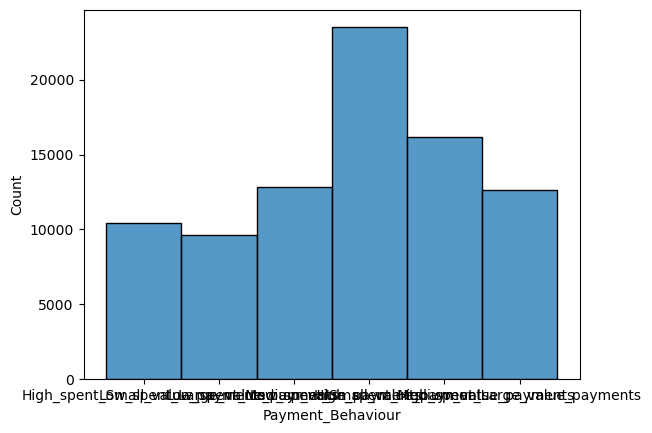

In [42]:
sns.histplot(train['Payment_Behaviour'])

Przejdzmy teraz do imputacji wartości kategorycznych. 

In [43]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')

In [44]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(train[categorical]),columns=categorical)

In [45]:
train[categorical] = imputed_categorical

In [46]:
train.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Udało się nie mamy juz zadnych nulli 

In [47]:
train['Occupation'] = train.groupby('Customer_ID')['Occupation'].transform(lambda x : x.mode()[0])

In [48]:
train['Occupation'].value_counts()

Occupation
Lawyer           6522
Mechanic         6280
Engineer         6273
Architect        6262
Scientist        6243
Developer        6192
Accountant       6183
Teacher          6169
Media_Manager    6155
Entrepreneur     6126
Journalist       6048
Doctor           6036
Manager          5922
Writer           5872
Musician         5871
_______            25
Name: count, dtype: int64

In [49]:
train.drop(train[train['Occupation'] =='_______'].index,inplace=True)

In [50]:
train.reset_index(drop=True,inplace=True)

In [51]:
train.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,23.0,Scientist,19114.12,4198.648006,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,17 Years and 9 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,23.0,Scientist,19114.12,4198.648006,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,23.0,Scientist,19114.12,4198.648006,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [52]:
train.select_dtypes(['object']).columns

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder as le
Customer_ID_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [54]:
train['Customer_ID'] = Occupation_le.fit_transform(train['Customer_ID'])
train['Occupation'] = Occupation_le.fit_transform(train['Occupation'])
train['Type_of_Loan'] = Type_of_Loan_le.fit_transform(train['Type_of_Loan'])
train['Credit_Mix'] = Credit_Mix_le.fit_transform(train['Credit_Mix'])
train['Credit_History_Age'] = Credit_History_Age_le.fit_transform(train['Credit_History_Age'])
train['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(train['Payment_of_Min_Amount'])
train['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(train['Payment_Behaviour'])
train['Credit_Score'] = Credit_Score_le.fit_transform(train['Credit_Score'])

Korelacja

<Axes: >

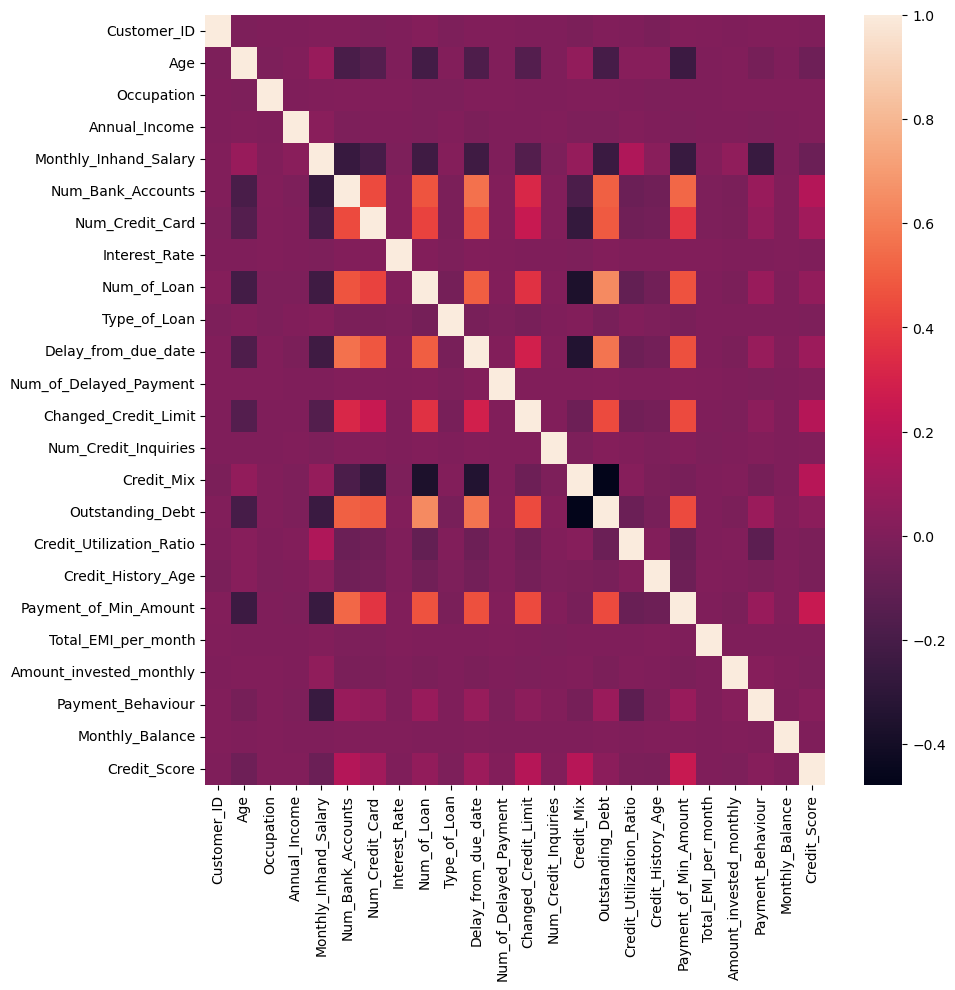

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.select_dtypes(include='number').corr())

Teraz na podstawie korelacji będziemy dobierać najbardziej znaczące zmienne.

In [56]:
round(abs(train.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Payment_of_Min_Amount        24.60
Credit_Mix                   18.84
Changed_Credit_Limit         18.38
Num_Bank_Accounts            17.69
Num_Credit_Card              11.35
Delay_from_due_date           9.65
Monthly_Inhand_Salary         6.99
Num_of_Loan                   6.43
Age                           5.86
Outstanding_Debt              3.74
Payment_Behaviour             2.11
Credit_History_Age            1.97
Credit_Utilization_Ratio      1.57
Num_of_Delayed_Payment        0.86
Type_of_Loan                  0.68
Amount_invested_monthly       0.68
Occupation                    0.62
Interest_Rate                 0.45
Monthly_Balance               0.40
Customer_ID                   0.30
Annual_Income                 0.27
Total_EMI_per_month           0.17
Num_Credit_Inquiries          0.16
Name: Credit_Score, dtype: float64

<Axes: >

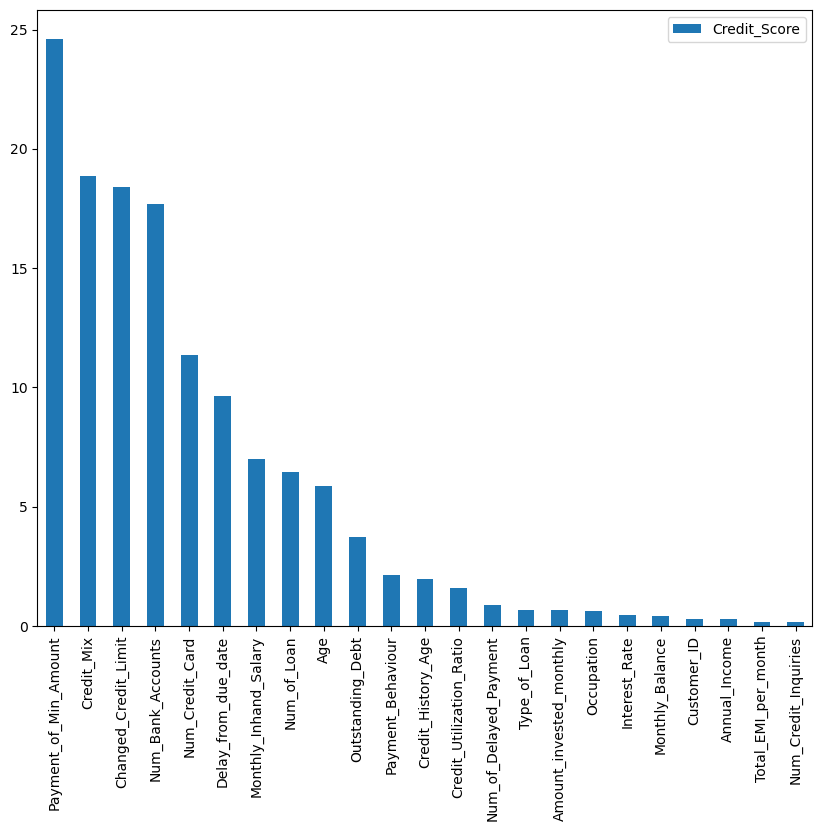

In [57]:
pd.DataFrame(abs(train.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [58]:
model = train[['Credit_Score', 'Payment_of_Min_Amount', 'Credit_Mix', 'Changed_Credit_Limit', 'Num_Bank_Accounts', 
             'Num_Credit_Card', 'Delay_from_due_date', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Age', 'Outstanding_Debt', 
             'Payment_Behaviour', 'Credit_History_Age', 'Credit_Utilization_Ratio']]
model.head()

,Credit_Score,Payment_of_Min_Amount,Credit_Mix,Changed_Credit_Limit,Num_Bank_Accounts,Num_Credit_Card,Delay_from_due_date,Monthly_Inhand_Salary,Num_of_Loan,Age,Outstanding_Debt,Payment_Behaviour,Credit_History_Age,Credit_Utilization_Ratio
0,0,0,2,11.27,3,4,3,1824.843333,4.0,23.0,809.98,2,180,26.822620
1,0,0,1,11.27,3,4,-1,4198.648006,4.0,23.0,809.98,3,118,31.944960
2,0,0,1,0.00,3,4,3,4198.648006,4.0,23.0,809.98,4,184,28.609352
3,0,0,1,6.27,3,4,5,4198.648006,4.0,23.0,809.98,5,185,31.377862
4,0,0,1,11.27,3,4,6,1824.843333,4.0,23.0,809.98,1,186,24.797347


Tworzenie modelu i podział danych

In [59]:
x = model.drop(['Credit_Score'] , axis = 1).values
y = model['Credit_Score' ].values

In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(69115, 13), (69115,)]

Zastosujemy skalowanie aby mieć pewność, że wartości odstające nie będą miały wpływu na naszą cechę. W tym celu posłużymy się `Robust Scaler`, która skaluje funkcje za pomocą statystyk odpornych na wartości odstające (usuwa medianę i skaluje dane zgodnie z zakresem kwantyli).

In [61]:
from sklearn.preprocessing import RobustScaler as rbScaler
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(69115, 13), (23039, 13)]

# Tworzenie modeli
Przejdziemy teraz do stworzenia modeli uczenia maszynowego. Stworzymy kilka modeli uczenia nadzorowanego i nienadzorowanego, oraz zrobimy ewaluacje ich jakości oraz porównamy je między sobą. 

### Model regresji logistycznej

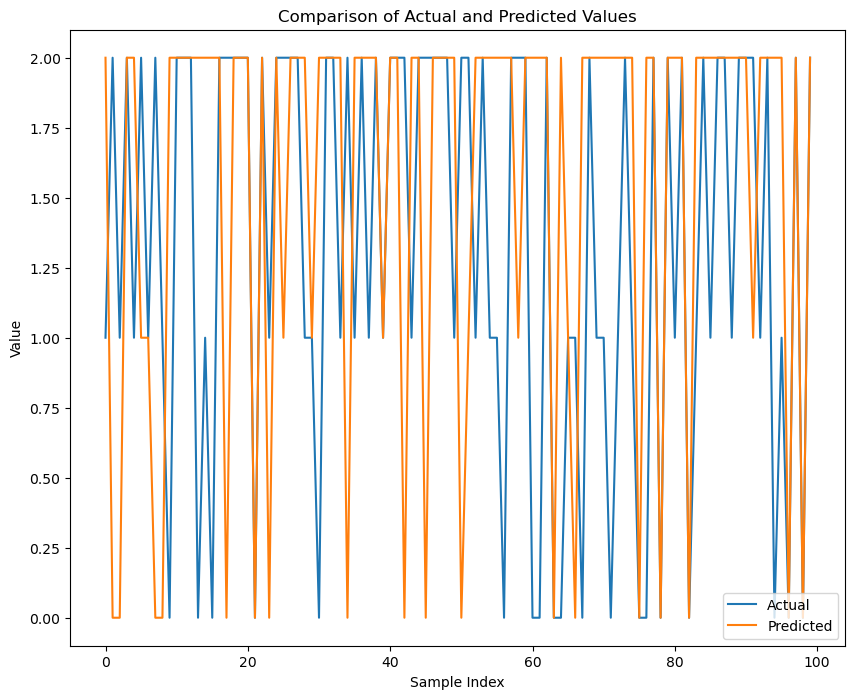

Confusion Matrix:
[[1808   49 2231]
 [ 282 3018 3424]
 [1030 1549 9648]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      4088
           1       0.65      0.45      0.53      6724
           2       0.63      0.79      0.70     12227

    accuracy                           0.63     23039
   macro avg       0.62      0.56      0.58     23039
weighted avg       0.63      0.63      0.62     23039

Accuracy: 0.6282


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

log_reg = LogisticRegression(C=100).fit(x_train, y_train)
log_reg_score_train = log_reg.score(x_train, y_train)
log_reg_score_test = log_reg.score(x_test, y_test)
y_pred = log_reg.predict(x_test)

dd = pd.DataFrame({"Y_test": y_test, "y_pred": y_pred})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual", "Predicted"], loc=4)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


#### Wnioski

Wynik modelu regresji logistycznej to średnia dokładność klasyfikacji wynosząca 0,6280, co oznacza, że około 63% próbek zostało poprawnie sklasyfikowanych.
Przy ocenie macierzy pomyłek można zobaczyć, że model ma problem z rozróżnieniem między klasami 0 i 1, co skutkuje występowaniem dość wysokiej liczby błędów. Model często błędnie identyfikuje próbki z klasy 0 jako należące do klasy 2, oraz próbki z klasy 1 jako należące do klasy 0 lub 2.
Wyniki analizy klasyfikacji wykazują zróżnicowane wartości dokładności, precyzji i czułości dla poszczególnych klas w modelu. Największe osiągnięcia zaobserwowano w klasie 2, gdzie dokładność wyniosła 0,79, a precyzja 0,63. Dla pierwszych dwóch klas wyniki są niższe, co wskazuje na potrzebę dalszego doskonalenia modelu.
Ważne jest dostrzeżenie, że wynik macro avg jest mniejszy od accuracy, co wskazuje na nierównomierną dokładność modelu w różnych klasach. Wskaźnik weighted avg jest zbliżony do accuracy, co wskazuje na większą dokładność modelu w przypadku klas z większą liczbą próbek.

### Model drzewa decyzyjnego

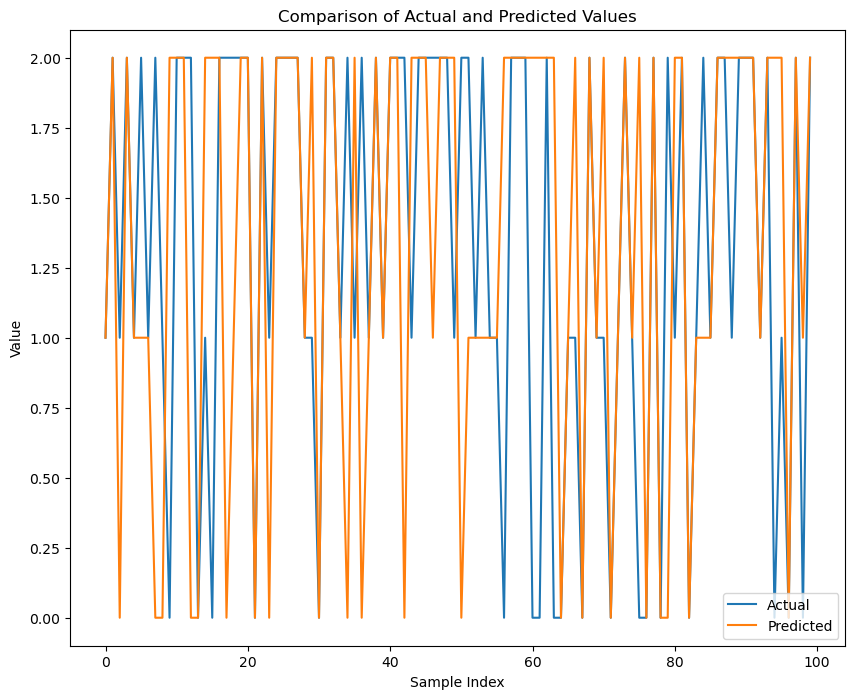

Confusion Matrix:
[[2531  159 1398]
 [ 478 4209 2037]
 [1436 1647 9144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      4088
           1       0.70      0.63      0.66      6724
           2       0.73      0.75      0.74     12227

    accuracy                           0.69     23039
   macro avg       0.67      0.66      0.66     23039
weighted avg       0.69      0.69      0.69     23039

Accuracy: 0.6894


In [63]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(max_features=14, max_depth=8)
dec_tree.fit(x_train, y_train)
dt_score_train = dec_tree.score(x_train, y_train)
dt_score_test = dec_tree.score(x_test, y_test)
y_pred = dec_tree.predict(x_test)

dd = pd.DataFrame({"Y_test": y_test, "y_pred": y_pred})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual", "Predicted"], loc=4)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

#### Wnioski

Model drzewa decyzyjnego uzyskał średnią dokładność klasyfikacji wynoszącą 0,6894, co oznacza, że około 69% próbek zostało poprawnie sklasyfikowanych.
Dzięki macierzy pomyłek widzimy, że model ma kłopoty z identyfikacją klas 0 i 1, gdzie poziom błędów jest dość wysoki. Model często błędnie identyfikuje próbki z klasy 0 jako należące do klasy 2, i próbki z klasy 1 jako należące do klasy 0 lub 2.
Wyniki raportu klasyfikacji wykazują, że model posiada różne wartości dokładności, precyzji i czułości dla poszczególnych klas. Najbardziej satysfakcjonujące rezultaty uzyskano dla kategorii 2, gdzie wartość dokładności wynosi 0,75, zaś precyzja 0,73. Wyniki dla klas 0 i 1 są słabsze, co wskazuje na konieczność dalszego doskonalenia modelu.
Należy zwrócić uwagę, że wynik macro avg jest mniejszy niż accuracy, co wskazuje na nierównomierną dokładność modelu w odniesieniu do różnych klas. Tak samo jak w modelu regresji logistycznej wskaźnik weighted avg wskazuje na większą dokładność modelu w przypadku klas z większymi liczbami próbek. Wyniki modelu drzewa decyzyjnego są jednak lepsze od wyników modelu regresji logistycznej, co wskazuje na jego większe dopasowanie dla tego konkretnego problemu.

[Text(0.5115536971830986, 0.9444444444444444, 'x[9] <= 0.238\ngini = 0.601\nsamples = 69115\nvalue = [12271, 20031, 36813]'),
 Text(0.27303403755868544, 0.8333333333333334, 'x[1] <= -0.5\ngini = 0.55\nsamples = 47071\nvalue = [11941, 6659, 28471]'),
 Text(0.14289906103286384, 0.7222222222222222, 'x[5] <= -0.083\ngini = 0.63\nsamples = 17733\nvalue = [8176, 3421, 6136]'),
 Text(0.07511737089201878, 0.6111111111111112, 'x[4] <= -0.833\ngini = 0.582\nsamples = 14301\nvalue = [7414, 1592, 5295]'),
 Text(0.03755868544600939, 0.5, 'x[6] <= 1.775\ngini = 0.34\nsamples = 2326\nvalue = [1821, 1, 504]'),
 Text(0.018779342723004695, 0.3888888888888889, 'x[6] <= -0.297\ngini = 0.32\nsamples = 2014\nvalue = [1611, 0, 403]'),
 Text(0.009389671361502348, 0.2777777777777778, 'x[9] <= -0.68\ngini = 0.378\nsamples = 566\nvalue = [423, 0, 143]'),
 Text(0.004694835680751174, 0.16666666666666666, 'x[6] <= -0.617\ngini = 0.477\nsamples = 84\nvalue = [51, 0, 33]'),
 Text(0.002347417840375587, 0.0555555555555

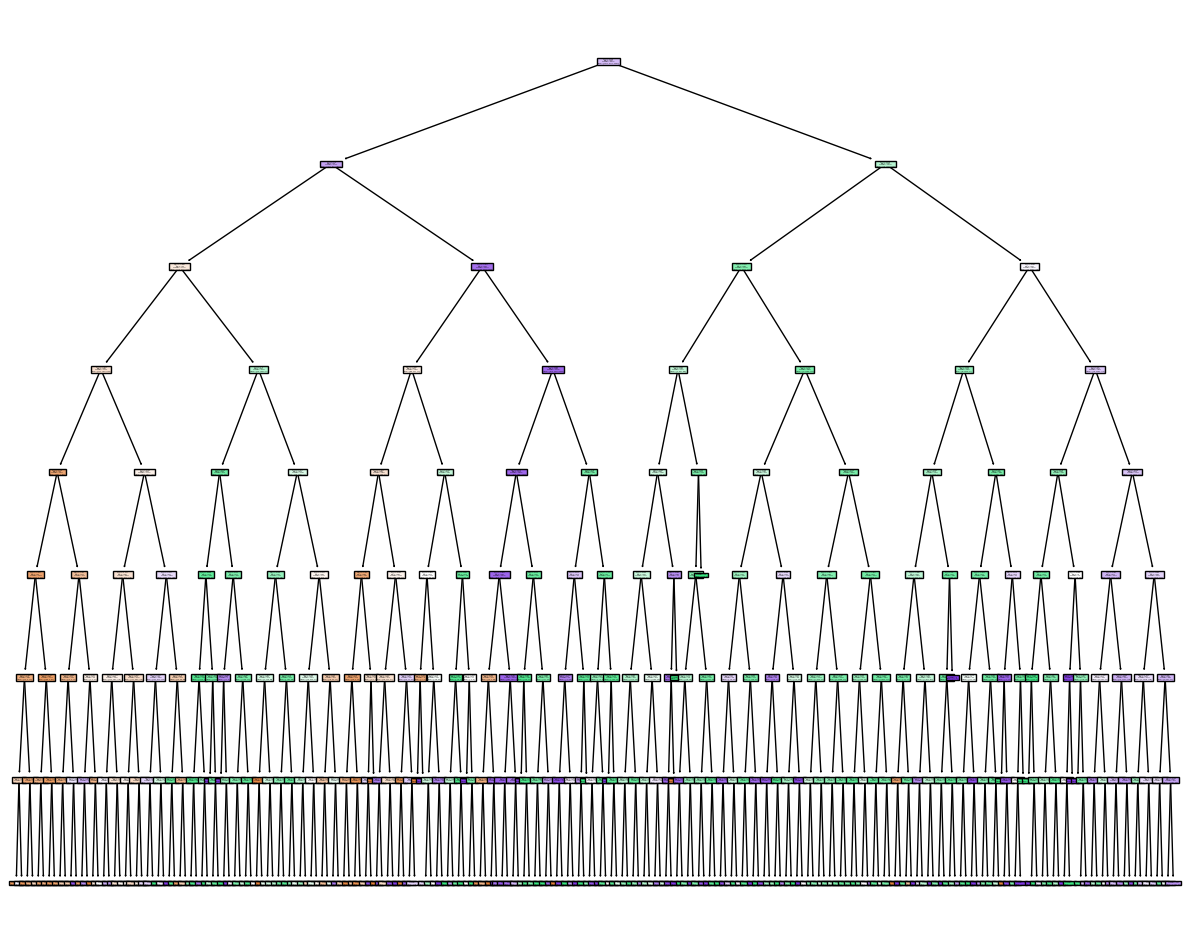

In [64]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dec_tree , filled=True)

### Model lasu losowego

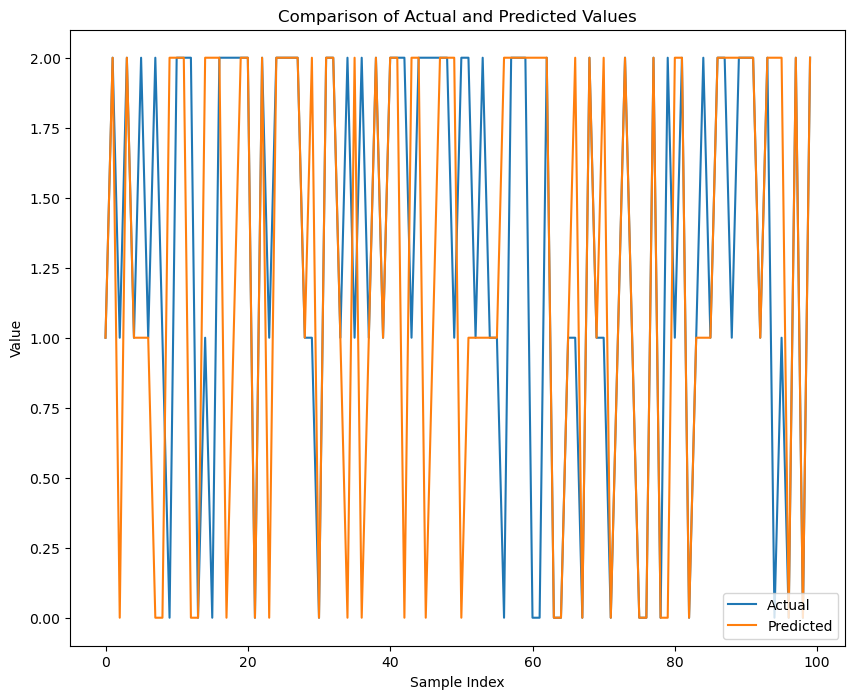

Confusion Matrix:
[[2620  110 1358]
 [ 508 4275 1941]
 [1521 1607 9099]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      4088
           1       0.71      0.64      0.67      6724
           2       0.73      0.74      0.74     12227

    accuracy                           0.69     23039
   macro avg       0.67      0.67      0.67     23039
weighted avg       0.70      0.69      0.69     23039

Accuracy: 0.6942


In [65]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(max_features=14, max_depth=8)
rand_forest.fit(x_train, y_train)
rf_score_train = rand_forest.score(x_train, y_train)
rf_score_test = rand_forest.score(x_test, y_test)
y_pred = rand_forest.predict(x_test)


dd = pd.DataFrame({"Y_test": y_test, "y_pred": y_pred})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual", "Predicted"], loc=4)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

#### Wnioski

Model lasu losowego osiągnął dokładność klasyfikacji na poziomie 69,42%, co oznacza, że około 7 próbek zostało poprawnie sklasyfikowanych na 10. Wskaźniki dokładności, precyzji i recall są podobne dla wszystkich klas, co oznacza, że model jest równomiernie dokładny dla wszystkich klas. Macierz confusion pokazuje, że model ma trudności z klasyfikacją klas 0 i 1, gdzie liczba błędów jest relatywnie wysoka. Wskaźniki F1 dla wszystkich klas są lepsze niż w przypadku modelu regresji logistycznej, co sugeruje, że model lasu losowego jest bardziej odpowiedni dla tego problemu. Należy rozważyć dalszą optymalizację modelu, aby poprawić dokładność klasyfikacji, szczególnie dla klas 0 i 1.

### Model XGBoost 
czyli zbiorowy, bazującym na drzewach, algorytme uczenia maszynowego, wykorzystujący strukturę wzmacniającą gradient

In [66]:
#pip install xgboost

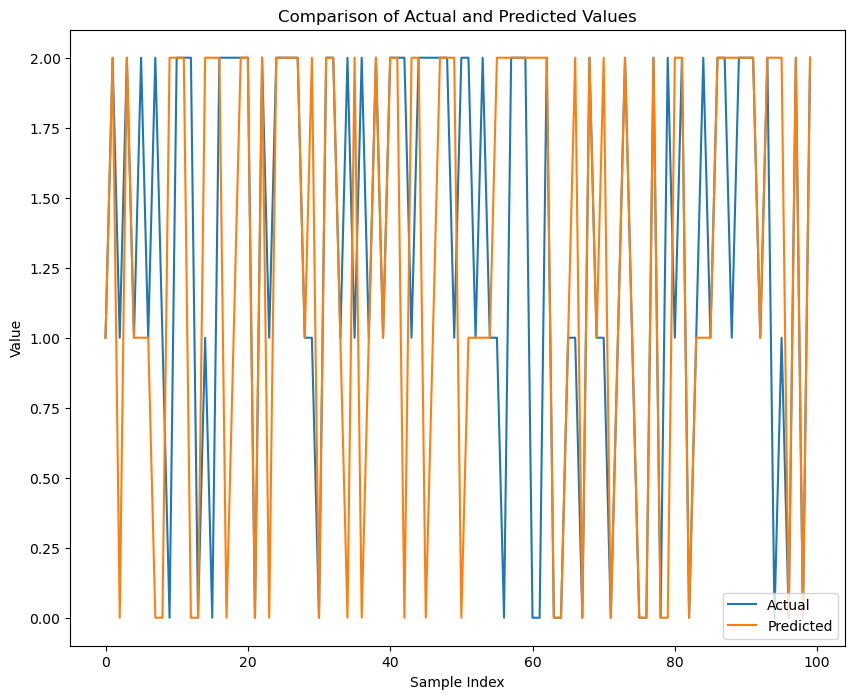

Confusion Matrix:
[[2669   80 1339]
 [ 616 4205 1903]
 [1602 1622 9003]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.65      0.59      4088
           1       0.71      0.63      0.67      6724
           2       0.74      0.74      0.74     12227

    accuracy                           0.69     23039
   macro avg       0.66      0.67      0.67     23039
weighted avg       0.69      0.69      0.69     23039

Accuracy: 0.6891


In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=5, learning_rate=0.3, objective='multi:softmax', n_estimators=5, random_state=42)
xgb.fit(x_train, y_train)
xgb_score_train = xgb.score(x_train, y_train)
xgb_score_test = xgb.score(x_test, y_test)
y_pred = xgb.predict(x_test)


dd = pd.DataFrame({"Y_test": y_test, "y_pred": y_pred})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual", "Predicted"], loc=4)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

#### Wnioski

Model XGBoost uzyskał dokładność klasyfikacji wynoszącą 0,6891, co oznacza, że około 69% próbek zostało sklasyfikowanych poprawnie.
Przyglądając się macierzy pomyłek, można zauważyć, że model ma problemy z rozróżnieniem klas 0 i 1, gdzie występuje duża liczba błędów. Specjalnie, model często identyfikuje próbki z grupy 0 jako przynależące do grupy 2, a próbki z grupy 1 jako przynależące do grupy 0 albo 2.
Rezultaty klasyfikacji raportu obrazują, że model posiada zróżnicowane miary dokładności, precyzji i recall dla poszczególnych klas. Największe osiągnięcia odnotowano w przypadku klasy 2, gdzie dokładność i precyzja wynoszą 0,74. Dla klas 0 i 1 rezultaty są mniej satysfakcjonujące, co wskazuje na konieczność dalszego doskonalenia modelu.
Warto zaznaczyć, że wynik macro avg jest mniejszy od accuracy, co sugeruje, że model nie osiąga równie wysokiej dokładności we wszystkich klasach. Wskaźnik średniej ważonej jest bardziej zbliżony do dokładności, co wskazuje na większą precyzję modelu dla klas z większą liczbą próbek.

# Porównanie modeli

In [68]:
from sklearn.model_selection import cross_val_score

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
]


for clf_name, clf in classifiers:
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, x_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall_macro').mean()
    
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.6261
Average Precision: 0.6144
Average Recall: 0.5638
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.6737
Average Precision: 0.6503
Average Recall: 0.6507
-----------------------


KeyboardInterrupt: 

Wyniki wskazują, że Random Forest jest najlepszym modelem, ponieważ osiągnął najwyższą średnią dokładność (0.7618), precyzję (0.7473) oraz czułość (0.7395). Ten model zdaje się być najbardziej efektywny w analizie danych. Następnie jest XGBoost, który uzyskał rezultaty niewiele gorsze od Random Forest, ale i tak dobre. Wyniki XGBoost wskazują, że mimo skuteczności, model może potrzebować dodatkowej optymalizacji. Decision Tree zajmuje trzecie miejsce w naszej klasyfikacji z rezultateam niewele gorszym od XGBoost. Wyniki wskazują, że ten model jest skuteczny, ale może potrzebować dalszego dostrojenia lub zmiany parametrów.
Model regresji liniowej wypada najgorzej na tle pozostałych osiągając najniższe wyniki. Wskazują one, iż model ten nie pasuje do tych danych i będzie potrzebował dalszej optymalizacji lub zmiany parametrów. Ważne jest zauważenie, że nie ma dużych różnic między wynikami różnych modeli, co wskazuje na trudności w klasyfikacji danych. Wyniki jednak wskazują na Random Forest jako najlepszy model dla tych danych.


### Neutral Network

In [ ]:
#pip install tensorflow

In [ ]:
import tensorflow as tf
net_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:])),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax'),
])

net_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
net_model.summary()

In [ ]:
history = net_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=0)

NameError: name 'net_model' is not defined

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

NameError: name 'plt' is not defined

Wykres straty pokazuje, jak zmieniała się wartość funkcji straty (błędu) w trakcie treningu na danych treningowych i walidacyjnych. Idealnie, wartość straty na zbiorze walidacyjnym powinna maleć wraz z każdą epoką, a wzrost straty na zbiorze walidacyjnym może wskazywać na przeuczenie modelu. W naszym wypadku występuje jednak ta druga opcja.

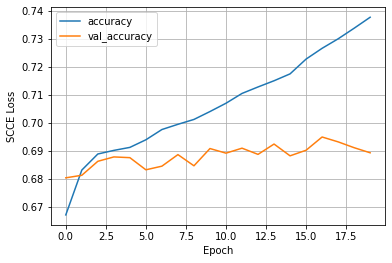

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

Powyższy wykres przedstawia dokładność modelu na danych treningowych i walidacyjnych w trakcie treningu. Optymalnie, obie krzywe powinny dążyć do stabilizacji na podobnym poziomie. Jeśli dokładność na zbiorze walidacyjnym zaczyna maleć, może to oznaczać przeuczenie modelu. I tutaj również można zauważyć, że następuje przeuczenie modelu.

In [ ]:
test_loss, test_accuracy = net_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6842 - loss: 0.7314
Test Loss: 0.7308
Test Accuracy: 0.6894


#### Wnioski

Model uczenia nadzorowanego uzyskał średnią stratę testową na poziomie 0,7308 oraz dokładność testową wynoszącą 0,6894. Im mniejsze są straty, tym bardziej precyzyjne są prognozy modelu. Poziom straty testowej wynoszący 0,7308 oznacza, że model nie jest doskonale precyzyjny, jednak jego prognozy są skuteczne.
Skuteczność testowa to odsetek prawidłowych prognoz wykonanych przez model na zbiorze testowym. Wskaźnik dokładności testowej wynoszący 0,6894 oznacza, że model poprawnie zaklasyfikował około 69% próbek.
Warto zauważyć, że te wyniki są lepsze niż przypadkowe przewidywania. Jednakże, istnieje możliwość dalszej optymalizacji modelu, aby poprawić jego dokładność i zmniejszyć błąd.

Przejdźmy teraz do zbudowania modeli uczenia nienadzorowanego.

# Algorytm K-means

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# Klasteryzacja
x_train_kmeans = x_train
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_train_kmeans)
clusters = kmeans.labels_


/Users/jakubsuslik/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
silhouette_avg = silhouette_score(x_train_kmeans, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1562074091522963


# Wnioski
Uzywając algorytmy k-means, wybraliśmy 3 klastry, sugerując się targetami z pierwotnego zbioru. Współczynnik Silhouette mierzącym, jak dobrze punkty danych są przypisane do swoich klastrów, wynosi 0.16, co jest słabym wynikiem i wskazuje na słabe rozdzielenie oraz spójność klastrów, sugerując, że punkty danych mogą być niejednoznacznie przypisane do swoich klastrów. Spróbujmy czy wykonanie PCA na danych moze poprawić wyniki. 

# PCA 
Wykonując PCA, spróbujmy sprawadzić dane do 5 głównych skłądowych. 

In [ ]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)


[0.36062396 0.10599569 0.08621072 0.06903342 0.06499302]
0.6868568100076509
[397.65905748 215.5895466  194.43042471 173.98559685 168.81729885]


Widzimy, ze 5 składowych wyjaśnia 68.7% wariancji. Ponówny teraz algorytm na danych z wykorzystaniem PCA. 

In [ ]:
x_train_kmeans = data_pca
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_train_kmeans)
clusters = kmeans.labels_

/Users/jakubsuslik/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.25937805463914737


# Wnisoki
Współczynnik Silhouette poprawił się, ale nadal algorytm ma problem z dobrym klasterowaniem zbioru. Dodatkowo nie mamy pewności, czy algorytm dzieli go zgodnie z naszymi oczekiwaniami. 